# Dataset Description :
    This dataset contains prices of New York houses, providing valuable insights into the real estate market in the region. It includes information such as broker titles, house types, prices, number of bedrooms and bathrooms, property square footage, addresses, state, administrative and local areas, street names, and geographical coordinates.

# Dataset Key Features: 
1 BROKERTITLE: Title of the broker
2 TYPE: Type of the house
3 PRICE: Price of the house
4 BEDS: Number of bedrooms
5 BATH: Number of bathrooms
6 PROPERTYSQFT: Square footage of the property
7 ADDRESS: Full address of the house
8 STATE: State of the house
9 MAIN_ADDRESS: Main address information
10 ADMINISTRATIVE_AREA_LEVEL_2: Administrative area level 2 information
11 LOCALITY: Locality information
12 SUBLOCALITY: Sublocality information
13 STREET_NAME: Street name
14 LONG_NAME: Long name
15 FORMATTED_ADDRESS: Formatted address
16 LATITUDE: Latitude coordinate of the house
17 LONGITUDE: Longitude coordinate of the house

## Tasks:

Perform Exploratory Data Analysis (EDA).
Find new features for training.
Build a model, tune parameters for training, and select the best one.

# 1. Exploratory Data Analysis

## Importing Libraries & Loading Data

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# ML Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

### To avoid the warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [3]:
df=pd.read_csv("NY-House-Dataset.csv")
df

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752


## Basic Data Insecption

In [4]:
# Getting shape and size
print(f"This data has {df.shape[0]} rows/enties and {df.shape[1]} columns/features.")

This data has 4801 rows/enties and 17 columns/features.


In [5]:
# The info() is used to display the datatype of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [6]:
# This dataset is used to display First few rows
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [7]:
# This dataset is used to display last few rows
df.tail()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.0,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.0,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.0,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.0,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752
4800,Brokered by Nyc Realty Brokers Llc,Co-op for sale,349000,1,1.0,750.000000,460 Neptune Ave Apt 14O,"Brooklyn, NY 11224","460 Neptune Ave Apt 14OBrooklyn, NY 11224",New York,Kings County,Brooklyn,Coney Island,460,"460 Neptune Ave #14a, Brooklyn, NY 11224, USA",40.579147,-73.970949


In [8]:
# Statistical Summary of all columns
df.iloc[:, :-1].describe().T.sort_values(by='std', ascending = False)\
                          .style.background_gradient(cmap="Greens")\
                          .bar(subset=["max"], color='#F8766D')\
                          .bar(subset=["mean"], color='#00BFC4')

,count,mean,std,min,25%,50%,75%,max
PRICE,4801.000000,2356940.171006,31355246.260352,2494.000000,499000.000000,825000.000000,1495000.000000,2147483647.000000
PROPERTYSQFT,4801.000000,2184.207862,2377.140894,230.000000,1200.000000,2184.207862,2184.207862,65535.000000
BEDS,4801.000000,3.356801,2.602315,1.000000,2.000000,3.000000,4.000000,50.000000
BATH,4801.000000,2.373861,1.946962,0.000000,1.000000,2.000000,3.000000,50.000000
LATITUDE,4801.000000,40.714227,0.087676,40.499546,40.639375,40.726749,40.771923,40.912729


In [9]:
# Getting and Storing all the Categorical variables
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']
print(f"Numbers of Categorical Features : {len(categorical_features)}")

# Getting and Storing all the Numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
print(f"Numbers of Numerical Features : {len(numerical_features)}")

Numbers of Categorical Features : 11
Numbers of Numerical Features : 6


In [10]:
# Getting Null values
feature_with_nan = [feature for feature in df.columns if df[feature].isnull().sum()>0]

for feature in feature_with_nan:
    print(f"{feature} has {df[feature].isnull().sum()} Null values i.e. around {np.round(df[feature].isnull().mean()*100,3)}% of total data.")

In [11]:
# To display stastical values of price column
print("Mean: " + str(df["PRICE"].mean()))
print("Count: " + str(df["PRICE"].count())) 
print("Max: " + str(df["PRICE"].max()))
print("Min: " + str(df["PRICE"].min()))
print("Meadian: " + str(df["PRICE"].median()))
print("Standart: " + str(df["PRICE"].std()))

Mean: 2356940.17100604
Count: 4801
Max: 2147483647
Min: 2494
Meadian: 825000.0
Standart: 31355246.26035201


## Data Cleaning

### Outerlier Analysis

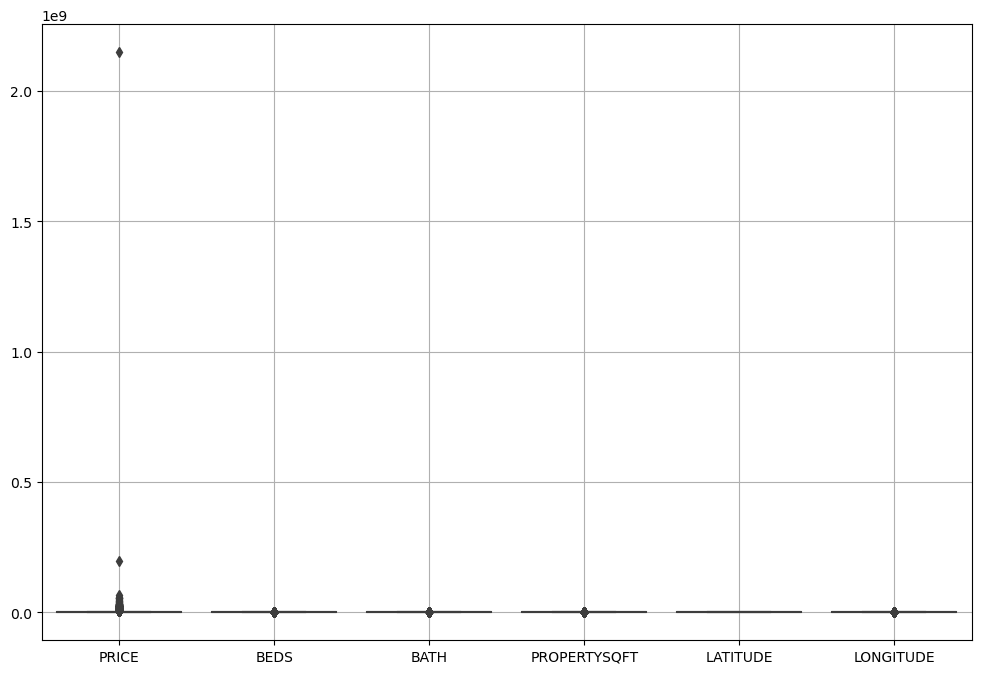

In [12]:
plt.figure(figsize = (12,8))
sns.boxplot(df)
plt.grid()
plt.show()

In [13]:
print('Price :')
print(f"Max Price : {df.PRICE.max()}")
print(f"Min Price : {df.PRICE.min()}")
print(f"Price > 2100000000  : {(df.PRICE > 200000).sum()}")
print()
print('Beds :')
print(f"Max Beds : {df.BEDS.max()}")
print(f"Min Beds : {df.BEDS.min()}")
print(f"Beds > 45 : {(df.BEDS > 90).sum()}")


print('Bath :')
print(f"Max Bath : {df.BATH.max()}")
print(f"Min Bath : {df.BATH.min()}")
print(f"Bath > 2100000000  : {(df.PRICE > 200000).sum()}")
print()
print('PropertySqft :')
print(f"Max PropertySqft : {df.PROPERTYSQFT .max()}")
print(f"Min PropertySqft : {df.PROPERTYSQFT .min()}")
print(f"PropertySqft  > 45 : {(df.PROPERTYSQFT  > 90).sum()}")
print()
print('Longitude :')
print(f"Max Longitude : {df.LONGITUDE .max()}")
print(f"Min Longitude : {df.LONGITUDE .min()}")
print(f"Longitude  > 45 : {(df.LONGITUDE  > 90).sum()}")

Price :
Max Price : 2147483647
Min Price : 2494
Price > 2100000000  : 4619

Beds :
Max Beds : 50
Min Beds : 1
Beds > 45 : 0
Bath :
Max Bath : 50.0
Min Bath : 0.0
Bath > 2100000000  : 4619

PropertySqft :
Max PropertySqft : 65535.0
Min PropertySqft : 230.0
PropertySqft  > 45 : 4801

Longitude :
Max Longitude : -73.70245
Min Longitude : -74.2530332
Longitude  > 45 : 0


In [14]:
# Replacing Outliers by upper cap values
def handle_outler(df,feature):
    # Calculating IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    # Calculating Lower & Upper Bound
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    # If data has Outlier changing it with Upper_Bound
    df[feature] = np.where(df[feature]>upper_bound,upper_bound,df[feature])
    
handle_outler(df,'PRICE')
handle_outler(df,'BATH')
handle_outler(df,'PROPERTYSQFT')
handle_outler(df,'LONGITUDE')
handle_outler(df,'BEDS')

df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000.0,2.0,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,2989000.0,7.0,6.000000,3660.519655,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000.0,4.0,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000.0,3.0,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,2989000.0,7.0,2.373861,3660.519655,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


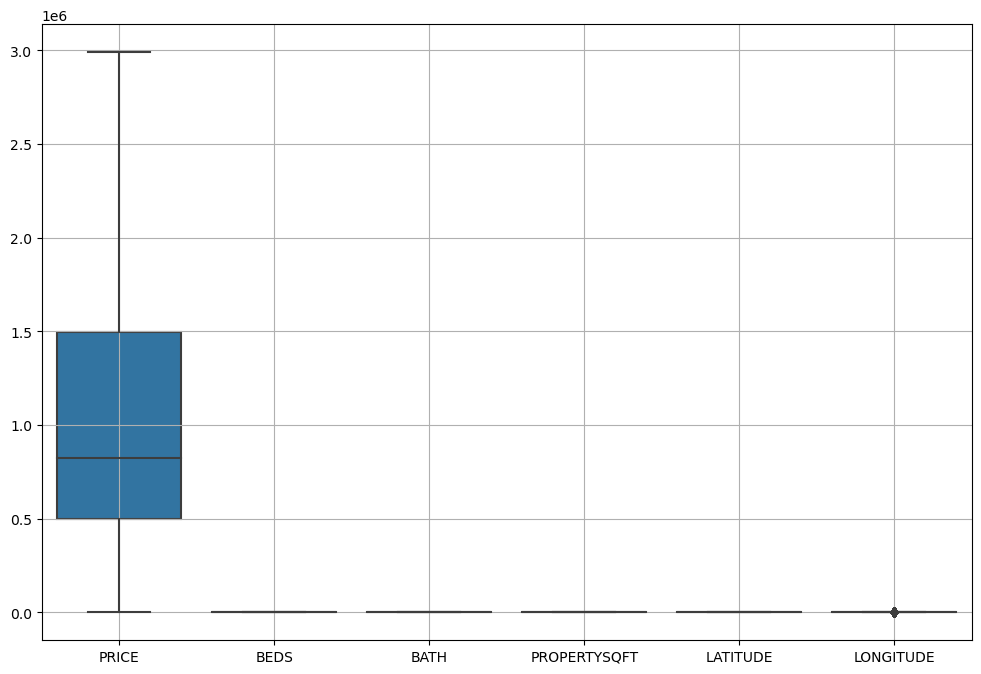

In [15]:
#Analysing the OUTLIERS
plt.figure(figsize = (12,8))
sns.boxplot(df)
plt.grid()
plt.show()

### Numerical & Categorical features

In [16]:
# Categorical Features
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']
print(f"Numbers of Categorical Features : {len(categorical_features)}")

# Numerical Features
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
print(f"Numbers of Numerical Features : {len(numerical_features)}")

Numbers of Categorical Features : 11
Numbers of Numerical Features : 6


## Data Visualization

In [17]:
priceOfBeds = df[['BEDS', 'PRICE']]
priceOfBeds

,BEDS,PRICE
0,2.0,315000.0
1,7.0,2989000.0
2,4.0,260000.0
3,3.0,69000.0
4,7.0,2989000.0
...,...,...
4796,1.0,599000.0
4797,1.0,245000.0
4798,1.0,1275000.0
4799,2.0,598125.0


In [18]:
bed_prices = priceOfBeds.groupby('BEDS').mean()
bed_prices

,PRICE
BEDS,
1.0,5.255029e+05
2.0,9.344163e+05
3.0,1.071526e+06
4.0,1.482738e+06
5.0,1.707713e+06
6.0,1.718331e+06
7.0,1.932641e+06


In [19]:
# lets see the numerical and categorical columns:
cat_col = df.select_dtypes(include = object)
num_col = df.select_dtypes([int,float])
display(cat_col.columns,"\n",num_col.columns,"\n\n")


Index(['BROKERTITLE', 'TYPE', 'ADDRESS', 'STATE', 'MAIN_ADDRESS',
       'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'STREET_NAME',
       'LONG_NAME', 'FORMATTED_ADDRESS'],
      dtype='object')

'\n'

Index(['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE'], dtype='object')

'\n\n'

In [20]:
# we can fetch both categorical and numerical columns by pyhton approach
ca_col = [i for i in df.columns if df[i].dtypes == "O"]

nm_col = [i for i in df.columns if i not in ca_col]
print(ca_col,"\n",nm_col)

['BROKERTITLE', 'TYPE', 'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME', 'FORMATTED_ADDRESS'] 
 ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']


In [21]:
def hist_box_plots(data,col,bins="auto"):
    fig,axis = plt.subplots(ncols=2,figsize=(11,3)) 
    sns.histplot(data=data,x=col,bins=bins,ax=axis[0],kde=True)
    sns.boxplot(data=data,x=col,ax=axis[1])

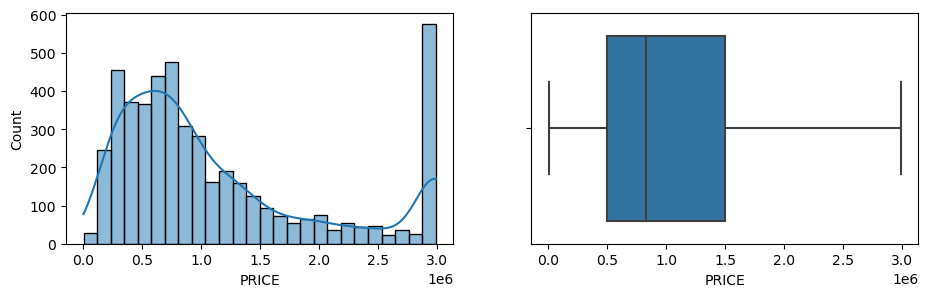

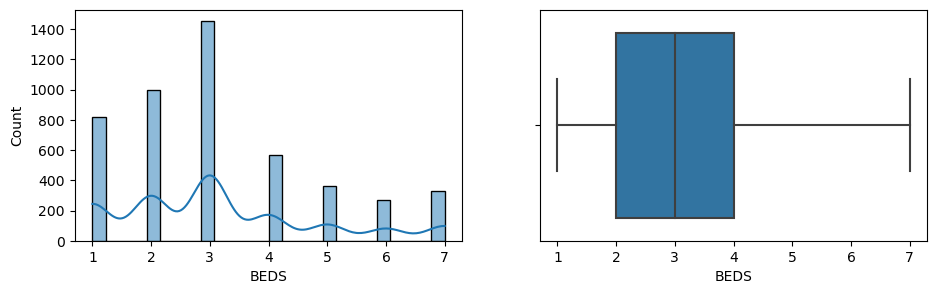

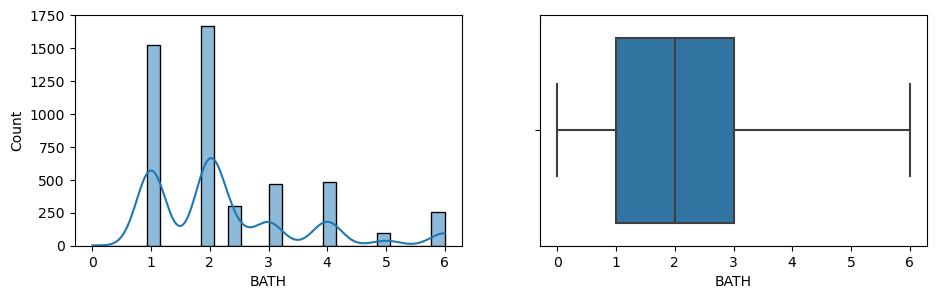

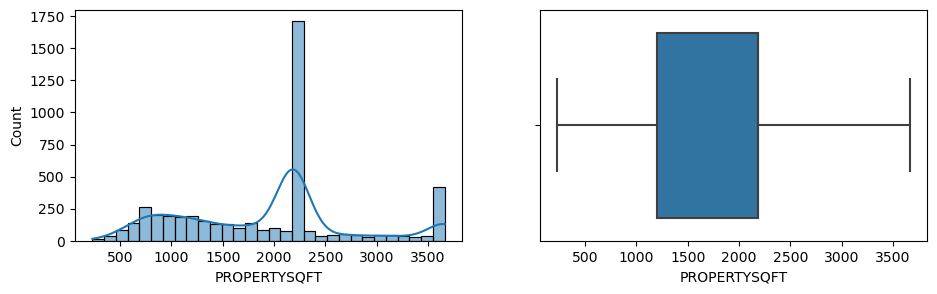

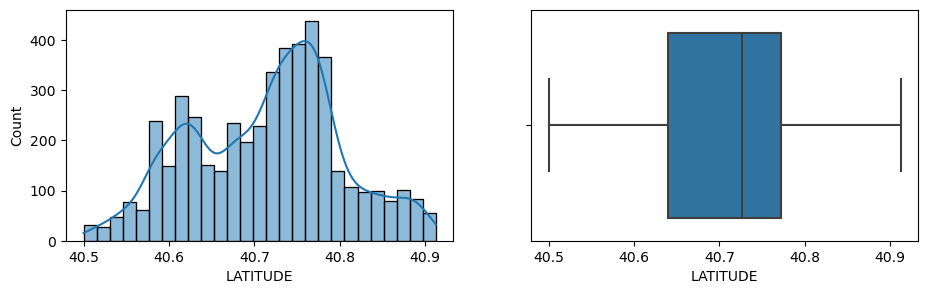

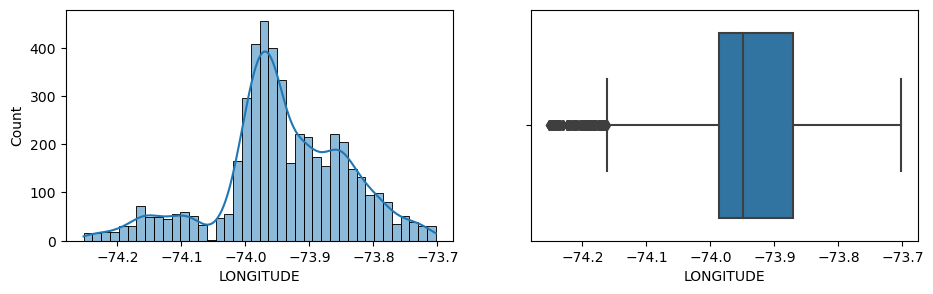

In [22]:
for col in num_col.columns:
    hist_box_plots(num_col,col)

In [23]:
def divide_feature_types(data):
    # Initialize
    Continues_feature = [] 
    Discrete_feature = [] 
    # loop through and separate columns
    for feature in data.columns: 
        if any(substring in feature for substring in ['PRICE', 'PROPERTYSQFT', 'BEDS', 'BATH', 'LATITUDE', 'LONGITUDE']):
            Continues_feature.append(feature)
        elif any(substring in feature for substring in ['BROKERTITLE', 'TYPE', 'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME', 'FORMATTED_ADDRESS']):
            Discrete_feature.append(feature)
    return Continues_feature, Discrete_feature

# Call the function and get column lists
Continues_feature, Discrete_feature = divide_feature_types(df)
print('Continuous numerical features: ', Continues_feature)
print('No. of Continuous features: ', len(Continues_feature))
print('\nCategorical or discrete features: ', Discrete_feature)
print('No. of Categorical features: ', len(Discrete_feature))


Continuous numerical features:  ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']
No. of Continuous features:  6

Categorical or discrete features:  ['BROKERTITLE', 'TYPE', 'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME', 'FORMATTED_ADDRESS']
No. of Categorical features:  11


### Continuous Features Visualization

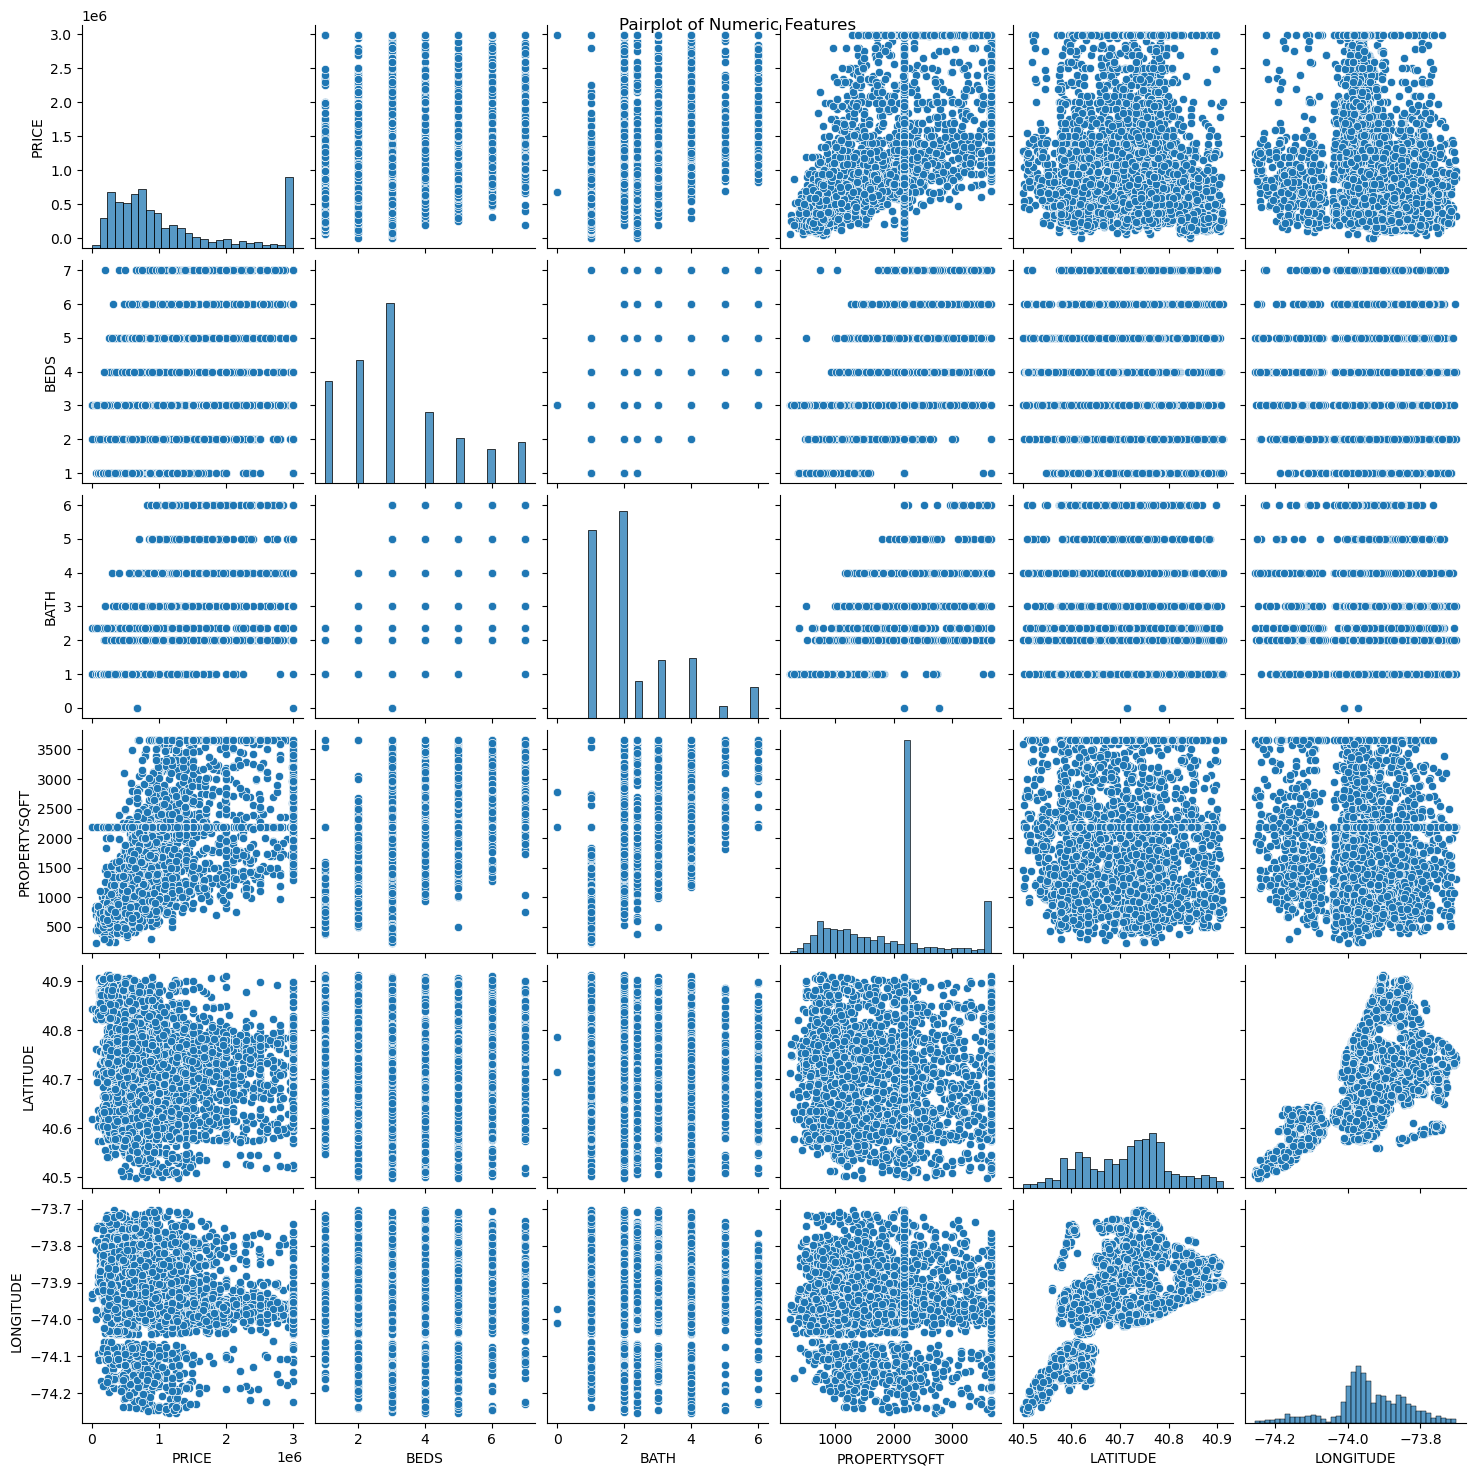

In [24]:
# Pairplot for visualizing relationships between numeric features
sns.pairplot(df[Continues_feature])
plt.suptitle('Pairplot of Numeric Features')
plt.show()


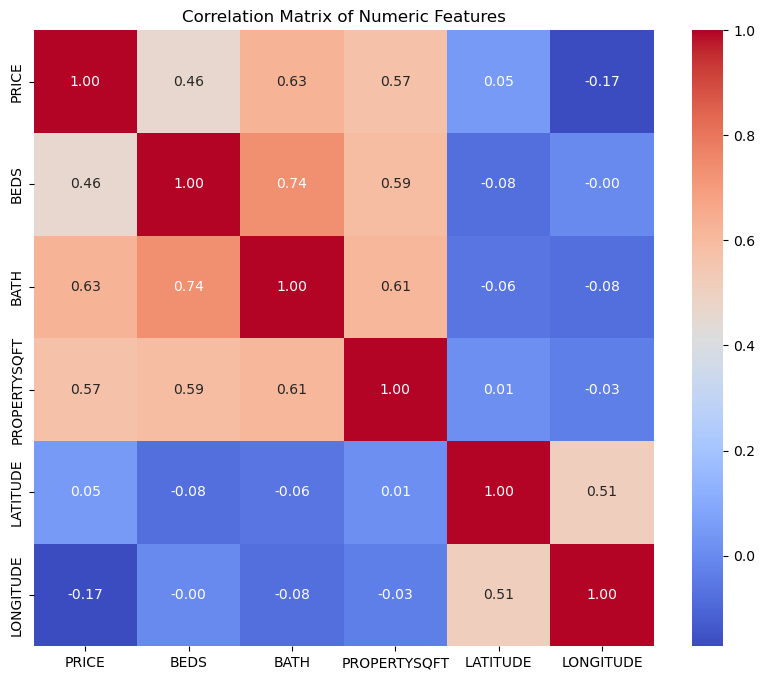

In [25]:
# Heatmap for correlation matrix of numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(df[Continues_feature].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()


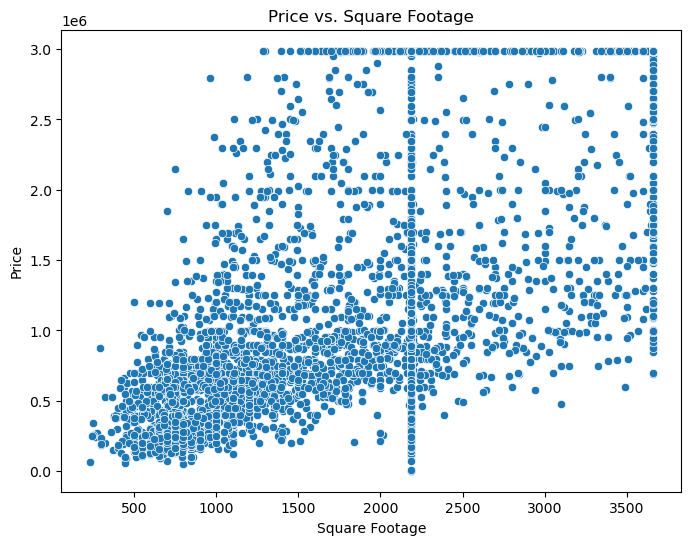

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PROPERTYSQFT', y='PRICE', data=df)
plt.title('Price vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()

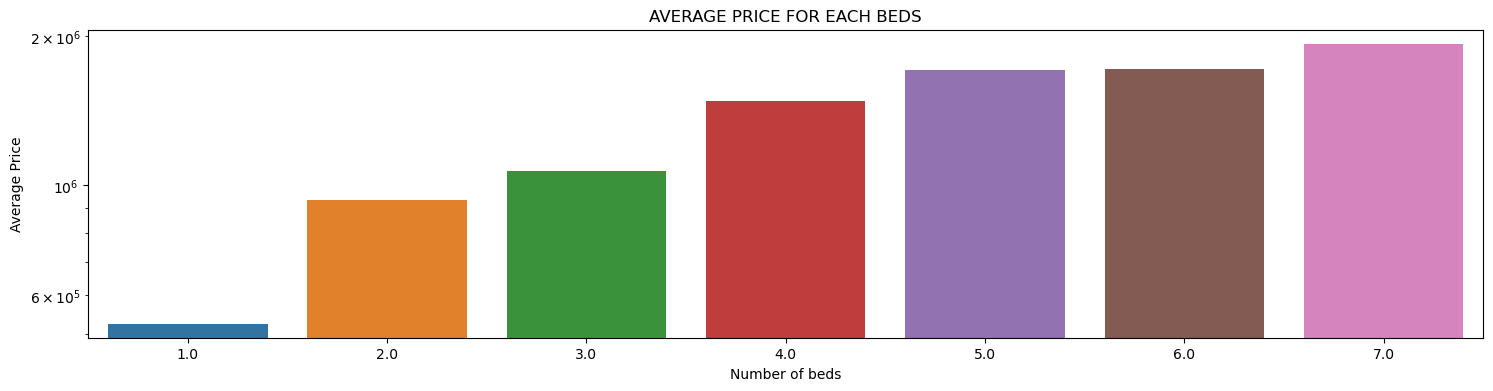

In [27]:
# Draw bar chart
fig, ax = plt.subplots(figsize=(18, 4))
fig = sns.barplot(data=bed_prices, x=bed_prices.index, y=bed_prices['PRICE'], log=True)
# ax.set_yticks(range(0, len(bed_prices['PRICE'])))
plt.xlabel('Number of beds')
plt.ylabel('Average Price')
plt.title('AVERAGE PRICE FOR EACH BEDS')
plt.show()

<Axes: title={'center': 'The price sum of each type'}, xlabel='TYPE'>

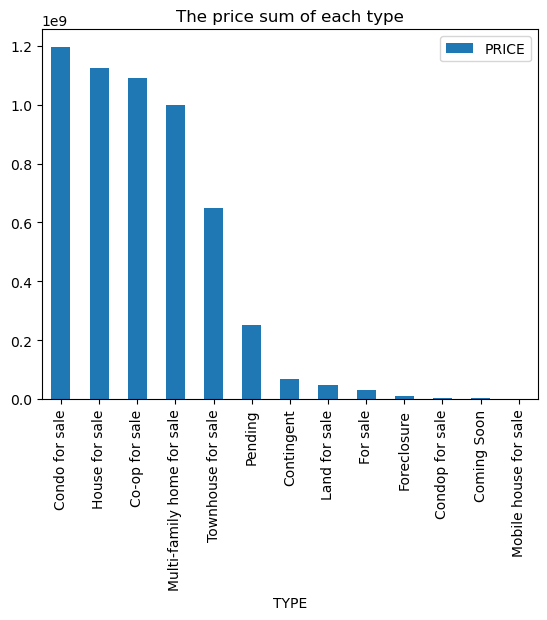

In [28]:
type_price_sum = df.groupby('TYPE')['PRICE'].sum().sort_values(ascending=False)
pd.DataFrame(type_price_sum).plot.bar(title='The price sum of each type')

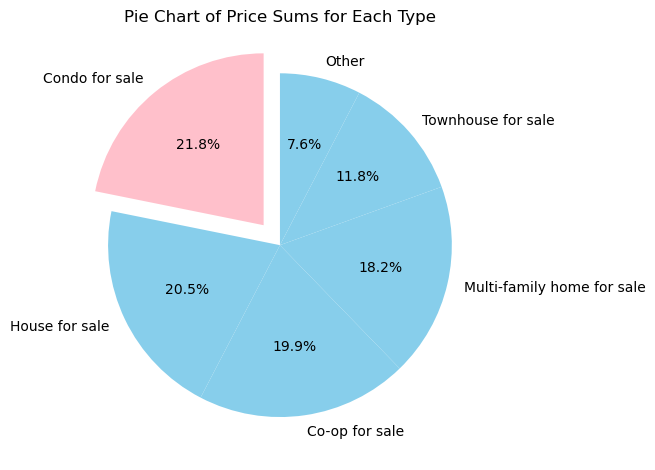

In [29]:
# Set a threshold for grouping minor categories
threshold = 0.5e9
minor_categories = type_price_sum[type_price_sum < threshold].index

# Create a new column 'type_grouped' with 'Other' for minor categories
df['type_grouped'] = df['TYPE'].apply(lambda x: x if x not in minor_categories else 'Other')

# Group by 'type_grouped' and calculate the sum of 'price' for each type
grouped_price_sum = df.groupby('type_grouped')['PRICE'].sum().sort_values(ascending=False)

# Set the type with the highest sum to explode
explode_values = [0.15 if type == grouped_price_sum.idxmax() else 0 for type in grouped_price_sum.index]
# Define colors for the pie chart
colors = ['pink' if type == grouped_price_sum.idxmax() else 'skyblue' for type in grouped_price_sum.index]

# Plot
plt.pie(grouped_price_sum, labels=grouped_price_sum.index, autopct='%1.1f%%', startangle=90, explode=explode_values, colors=colors)

# Adjust the layout and move the legend box
plt.title('Pie Chart of Price Sums for Each Type')
plt.tight_layout()
plt.show()

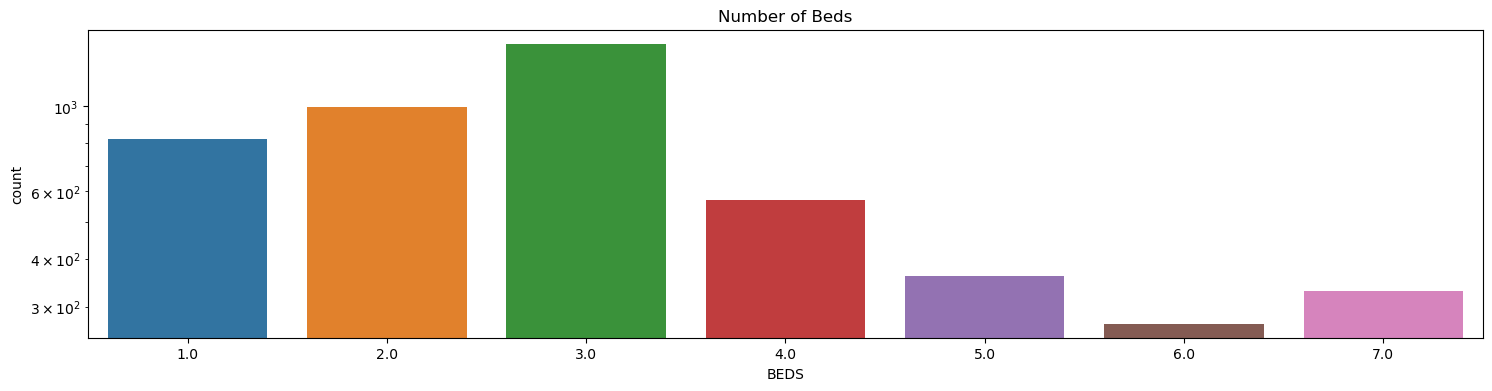

In [30]:
# Number Of Beds
fig, ax = plt.subplots(figsize=(18, 4))
fig = sns.countplot(data=df, x='BEDS', log=True)
plt.title('Number of Beds')
plt.show()

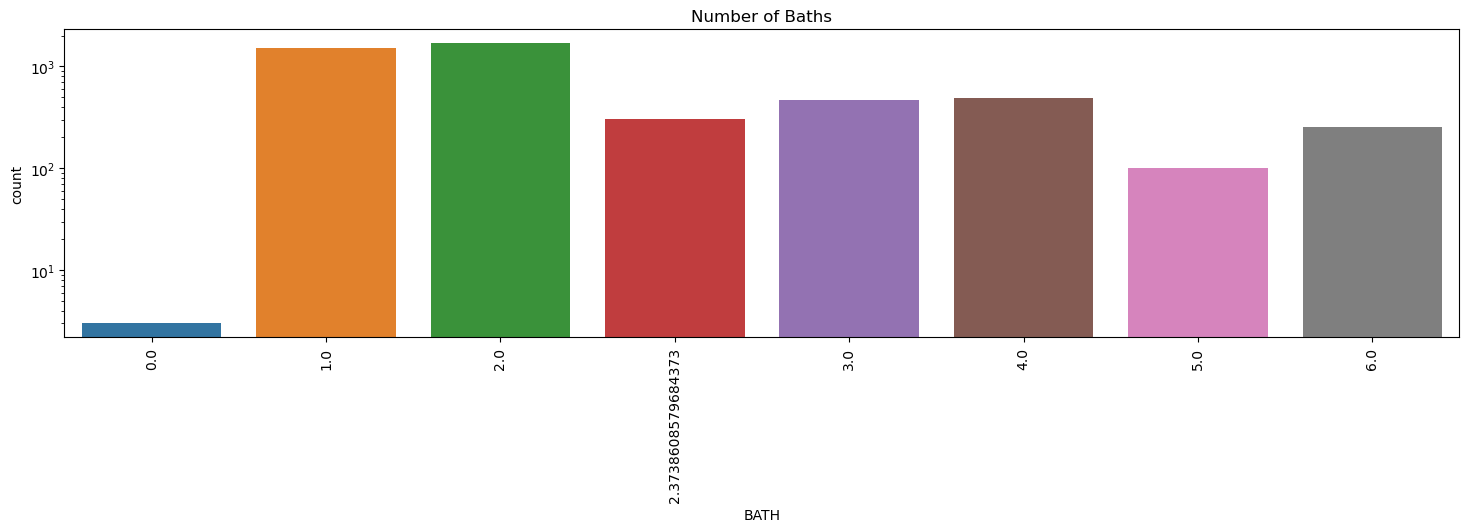

In [31]:
# Number of BAths
fig, ax = plt.subplots(figsize=(18, 4))
fig = sns.countplot(data=df, x='BATH', log=True)
plt.xticks(rotation=90)
plt.title('Number of Baths')
plt.show()

Text(0.5, 1.0, 'Number of Baths')

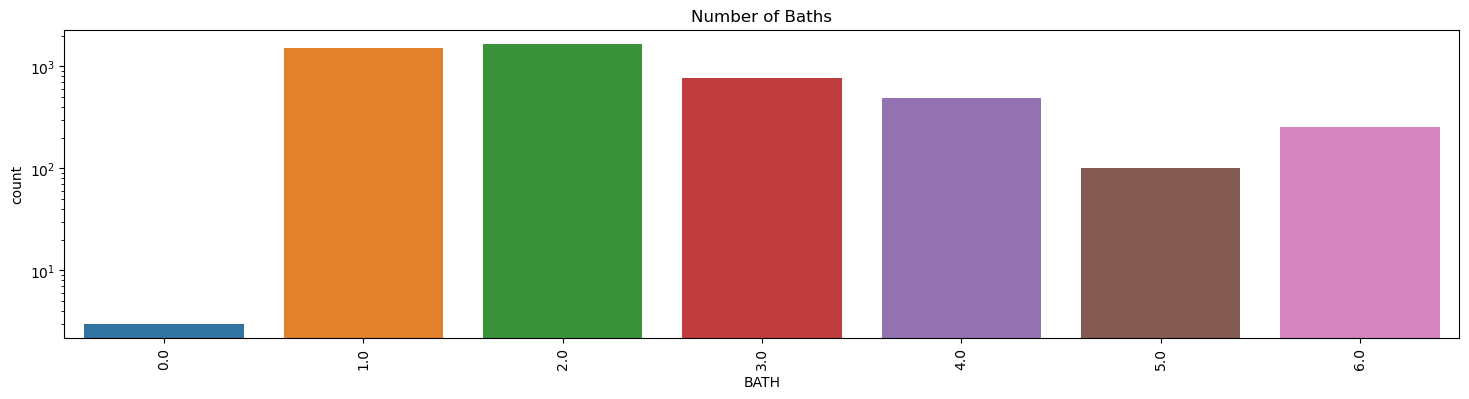

In [32]:
df['BATH'] = df['BATH'].apply(np.ceil)
# Convert 'BATH' column to float32 (or float64)
df['BATH'] = df['BATH'].astype('float32')
# Create the count plot
fig, ax = plt.subplots(figsize=(18, 4))
sns.countplot(data=df, x='BATH', log=True)
plt.xticks(rotation=90)
plt.title('Number of Baths')

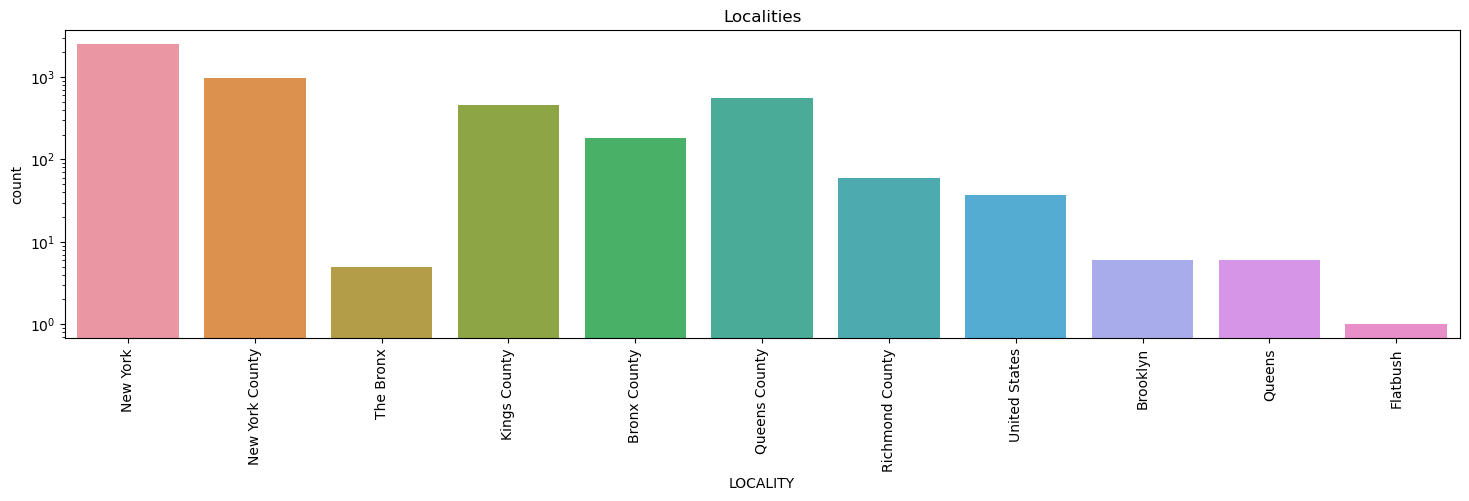

In [33]:
fig, ax = plt.subplots(figsize=(18, 4))
fig = sns.countplot(data=df, x='LOCALITY', log=True)
plt.xticks(rotation=90)
plt.title('Localities')
plt.show()

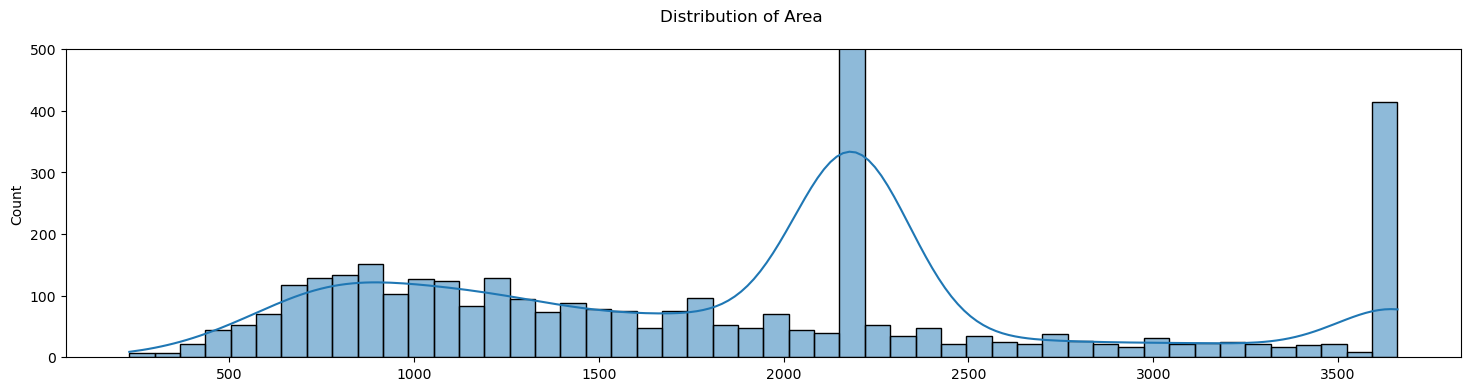

In [34]:
# Property area in SquareFeet:
# Distribution of various property's areas can be seen in following graph.
fig, ax = plt.subplots(figsize=(18, 4))
fig = sns.histplot(data=df, x='PROPERTYSQFT', bins=50, kde=True)
plt.ylim(0,500)
plt.ticklabel_format(style = 'plain')
fig.set(xlabel='')
plt.suptitle('Distribution of Area')
plt.show()

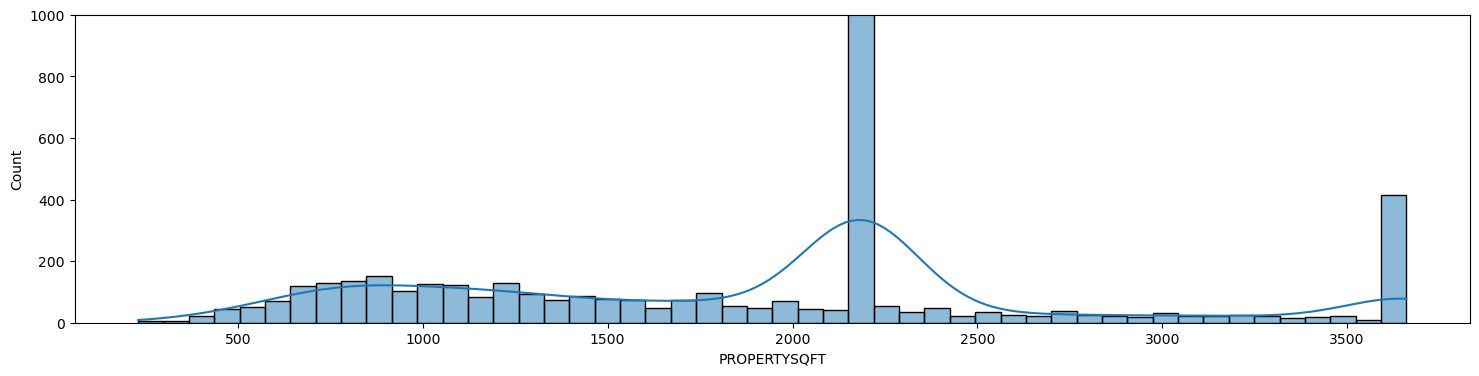

In [35]:
fig, ax = plt.subplots(figsize=(18, 4))
fig = sns.histplot(data=df, x='PROPERTYSQFT', bins=50, kde=True)
plt.ylim(0,1000)
plt.ticklabel_format(style = 'plain')
plt.show()

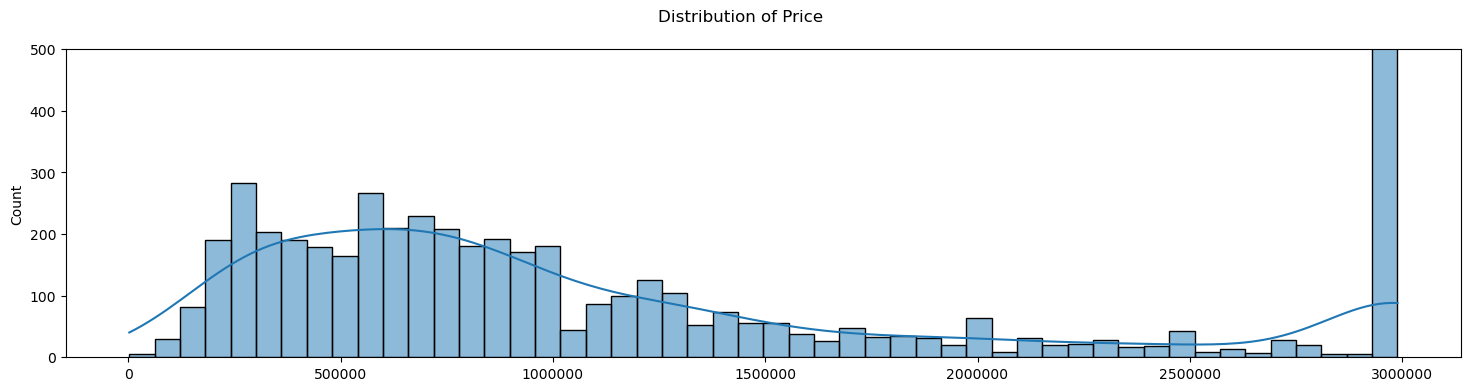

In [36]:
# Price: Distribution of prices of houses can be seen in following graph.
fig, ax = plt.subplots(figsize=(18, 4))
fig = sns.histplot(data=df, x='PRICE', bins=50, kde=True)
plt.ylim(0,500)
plt.ticklabel_format(style = 'plain')
fig.set(xlabel='')
plt.suptitle('Distribution of Price')
plt.show()

<Axes: ylabel='BEDS'>

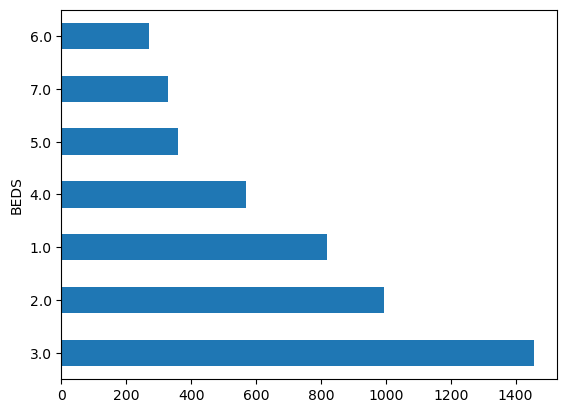

In [37]:
# Bar Graph related to the beds value count
df["BEDS"].value_counts().plot.barh()

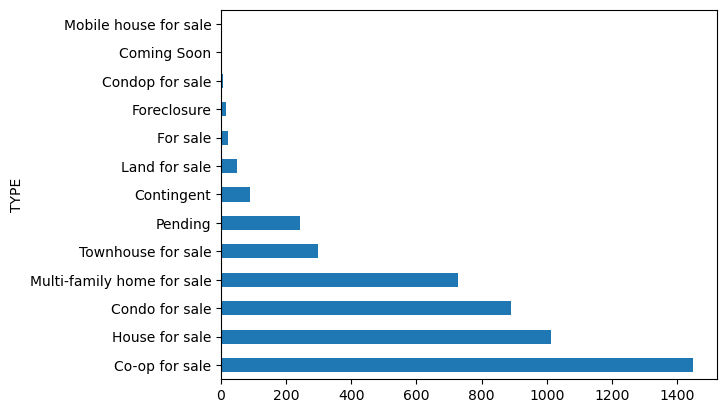

In [38]:
# Bar Graph related to the type value count
df["TYPE"].value_counts().plot.barh();

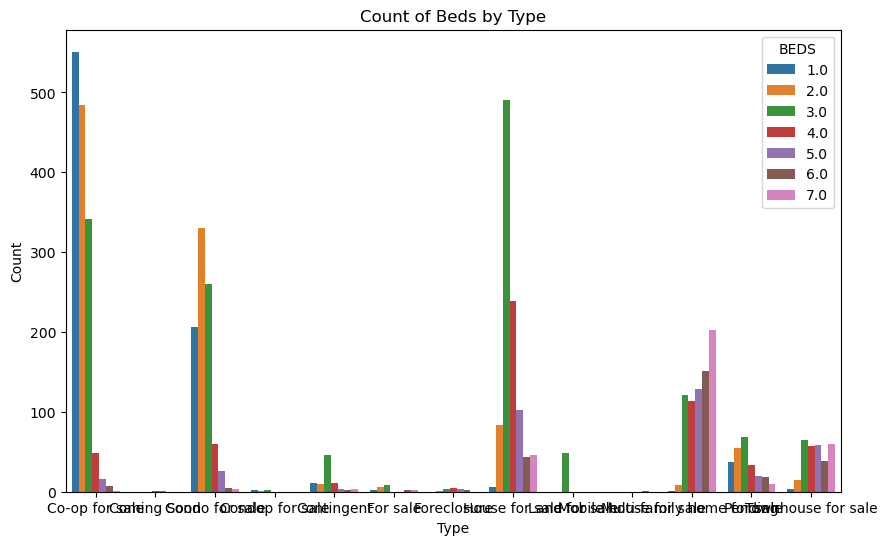

In [39]:
# Group by 'TYPE' and 'BEDS', count occurrences, and reset index
grouped_df = df.groupby(['TYPE', 'BEDS']).size().reset_index(name='count')
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='TYPE', y='count', hue='BEDS', data=grouped_df)
plt.title('Count of Beds by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

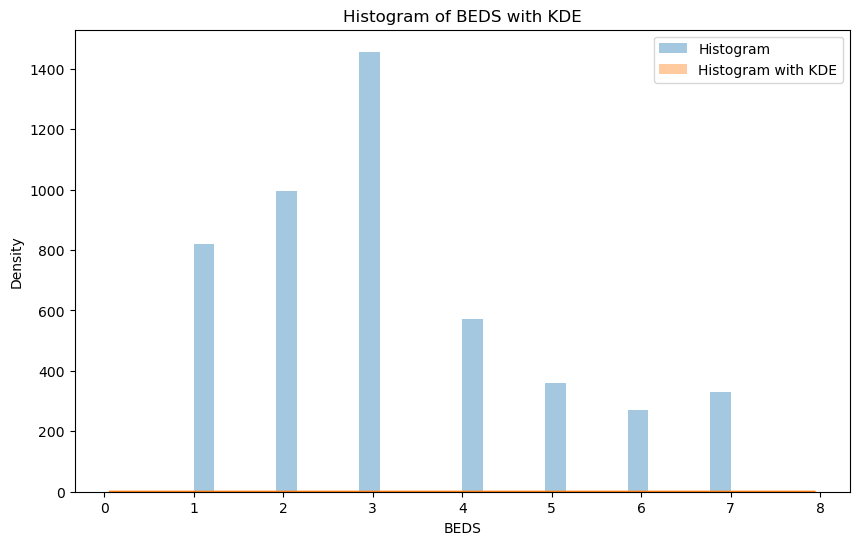

In [40]:
# Plotting
plt.figure(figsize=(10, 6))
# Plot histogram without KDE
sns.distplot(df.BEDS, kde=False, label='Histogram')
# Plot histogram with KDE
sns.distplot(df.BEDS, label='Histogram with KDE')
plt.title('Histogram of BEDS with KDE')
plt.xlabel('BEDS')
plt.ylabel('Density')
plt.legend()
plt.show()

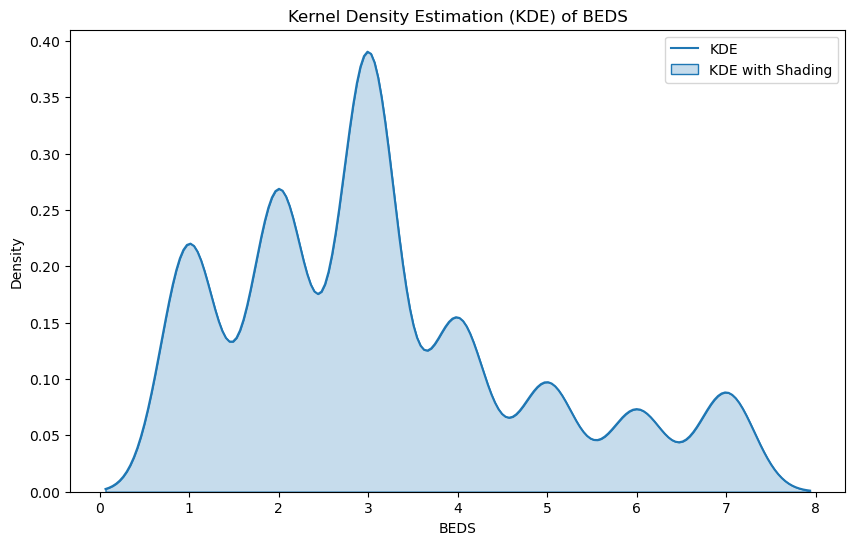

In [41]:
# Plotting
plt.figure(figsize=(10, 6))
# Plot KDE without shading
sns.kdeplot(df.BEDS, shade=False, label='KDE')
# Plot KDE with shading
sns.kdeplot(df.BEDS, shade=True, label='KDE with Shading')
plt.title('Kernel Density Estimation (KDE) of BEDS')
plt.xlabel('BEDS')
plt.ylabel('Density')
plt.legend()
plt.show()

array([[<Axes: title={'center': 'PRICE'}>,
        <Axes: title={'center': 'BEDS'}>],
       [<Axes: title={'center': 'BATH'}>,
        <Axes: title={'center': 'PROPERTYSQFT'}>],
       [<Axes: title={'center': 'LATITUDE'}>,
        <Axes: title={'center': 'LONGITUDE'}>]], dtype=object)

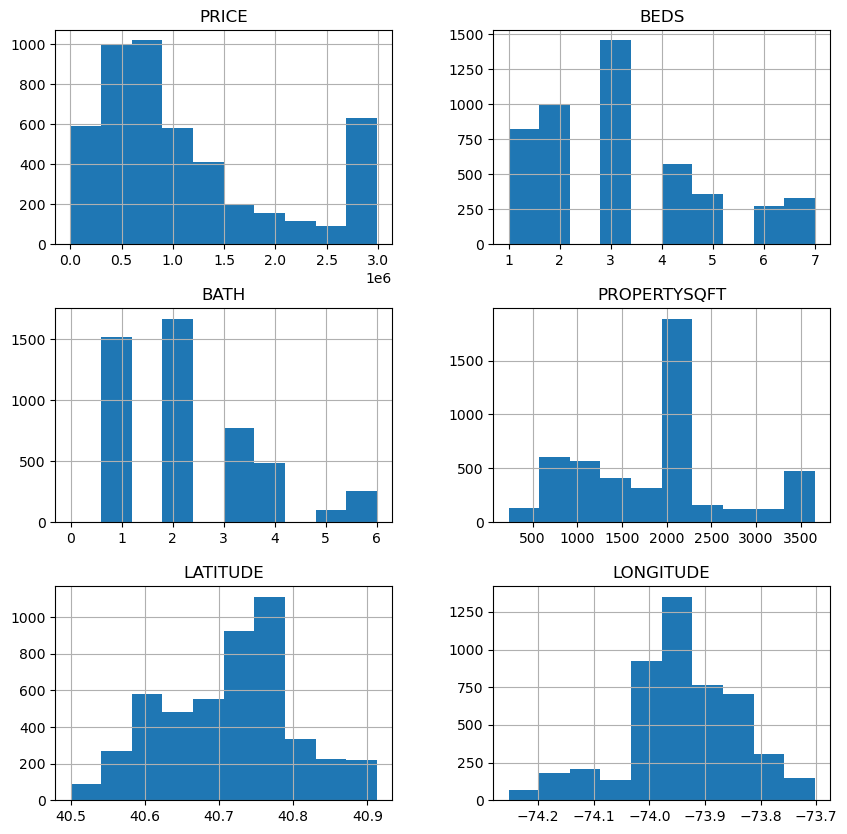

In [42]:
# Display Histogram for all columns
df.hist(figsize = (10,10))

#  Model  Building

## Dropping unnecessary columns

In [43]:
df = df.drop(['SUBLOCALITY'], axis=1)
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,type_grouped
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000.0,2.0,2.0,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,Condo for sale
1,Brokered by Serhant,Condo for sale,2989000.0,7.0,6.0,3660.519655,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,Condo for sale
2,Brokered by Sowae Corp,House for sale,260000.0,4.0,2.0,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,House for sale
3,Brokered by COMPASS,Condo for sale,69000.0,3.0,1.0,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,Condo for sale
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,2989000.0,7.0,3.0,3660.519655,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,Townhouse for sale


In [44]:
X = df[['BEDS','BATH','PROPERTYSQFT']]
y = df['PRICE']

In [45]:
X.head()

,BEDS,BATH,PROPERTYSQFT
0,2.0,2.0,1400.000000
1,7.0,6.0,3660.519655
2,4.0,2.0,2015.000000
3,3.0,1.0,445.000000
4,7.0,3.0,3660.519655


In [46]:
y.head()

0     315000.0
1    2989000.0
2     260000.0
3      69000.0
4    2989000.0
Name: PRICE, dtype: float64

### Splitting data into train and test

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=42,)

In [48]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3600, 3)
(3600,)
(1201, 3)
(1201,)


In [49]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_pred = linear_reg.predict(X_test)

In [50]:
# Decision Tree Regression
dt_reg = DecisionTreeRegressor(random_state=10)
dt_reg.fit(X_train, y_train)
dt_pred = dt_reg.predict(X_test)

In [51]:
# Support Vector Regression
svr_reg = SVR()
svr_reg.fit(X_train, y_train)
svr_pred = svr_reg.predict(X_test)

In [52]:
# Random Forest Regression
rf_reg = RandomForestRegressor(random_state=10)
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)

In [53]:
# Evaluate models
def evaluate_model(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Model:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")
    print("")

In [54]:
# Evaluate Linear Regression Model
evaluate_model("Linear Regression", y_test, linear_pred)

Linear Regression Model:
Mean Squared Error: 389203630865.85046
R-squared Score: 0.4834227880688571



In [55]:
# Evaluate Decision Tree Regression Model
evaluate_model("Decision Tree Regression", y_test, dt_pred)

Decision Tree Regression Model:
Mean Squared Error: 443367776149.0127
R-squared Score: 0.41153249481860377



In [56]:
# Evaluate Random Forest Regression Model
evaluate_model("Random Forest Regression", y_test, rf_pred)

Random Forest Regression Model:
Mean Squared Error: 351379953353.964
R-squared Score: 0.5336249144740128



In [57]:
# Evaluate Support Vector Regression Model
evaluate_model("Support Vector Regression", y_test, svr_pred)

Support Vector Regression Model:
Mean Squared Error: 837095272508.4438
R-squared Score: -0.11104909538266594



In [58]:
#k-nearest neighbors
from sklearn.neighbors import KNeighborsRegressor
knn_model=KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train,y_train)
knn_predictions=knn_model.predict(X_test)
#mean squared error
mse=mean_squared_error(y_test,knn_predictions)
print("means squared error:",mse)

means squared error: 426626351838.64417


In [59]:
#Y = β0 + β1X1 + β2X2 + β3X3 + … + βnXn + e
print("intercept i.e b0",linear_reg.intercept_)
print("coefficients i.e b1,b2,b3")
list(zip(X,linear_reg.coef_))

intercept i.e b0 -88774.89798797085
coefficients i.e b1,b2,b3


[('BEDS', -57817.76675112241),
 ('BATH', 340850.8589237652),
 ('PROPERTYSQFT', 327.5346777606801)]

In [60]:
from sklearn.naive_bayes import GaussianNB
# Initialize and train the Gaussian Naive Bayes classifier  
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
# Make predictions on the test set
nb_predictions = nb_classifier.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score
# Calculate the accuracy score
accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", accuracy) 

Naive Bayes Accuracy: 0.028309741881765195


In [62]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Extract relevant columns
x = df[['BEDS','BATH','PROPERTYSQFT']]
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
# Choose the number of clusters (you can experiment with different values)
num_clusters = 3

In [63]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
print("Cluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))

Cluster Centers:
[[1.94365193e+00 1.41868759e+00 9.12680456e+02]
 [5.45731707e+00 4.14895470e+00 2.90575547e+03]
 [2.75299867e+00 1.94224789e+00 2.05870383e+03]]


In [64]:
from sklearn import metrics
mean_aberror = metrics.mean_absolute_error(y_test,linear_pred)
mean_sqerror = metrics.mean_squared_error(y_test,linear_pred)
rmsqurrerror = np.sqrt(metrics.mean_squared_error(y_test,linear_pred))
print(linear_reg.score(x,y)*100)
print(mean_aberror) #0.00000000000004298186828178065
print(mean_sqerror)
print(rmsqurrerror) 

46.18876173734492
472945.31862587645
389203630865.85046
623861.8684178818


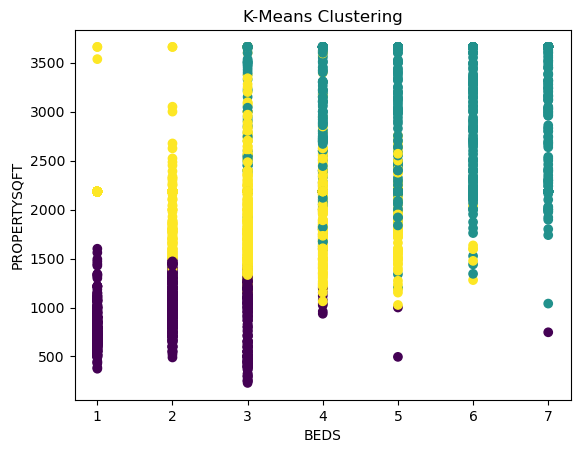

In [65]:
# Visualize the clusters (you can modify this based on your needs)
plt.scatter(df['BEDS'], df['PROPERTYSQFT'], c=df['Cluster'], cmap='viridis')
plt.xlabel('BEDS')
plt.ylabel('PROPERTYSQFT')
plt.title('K-Means Clustering')
plt.show()

#### We can create a scatter plot to visualize the actual vs predicted prices for each model:

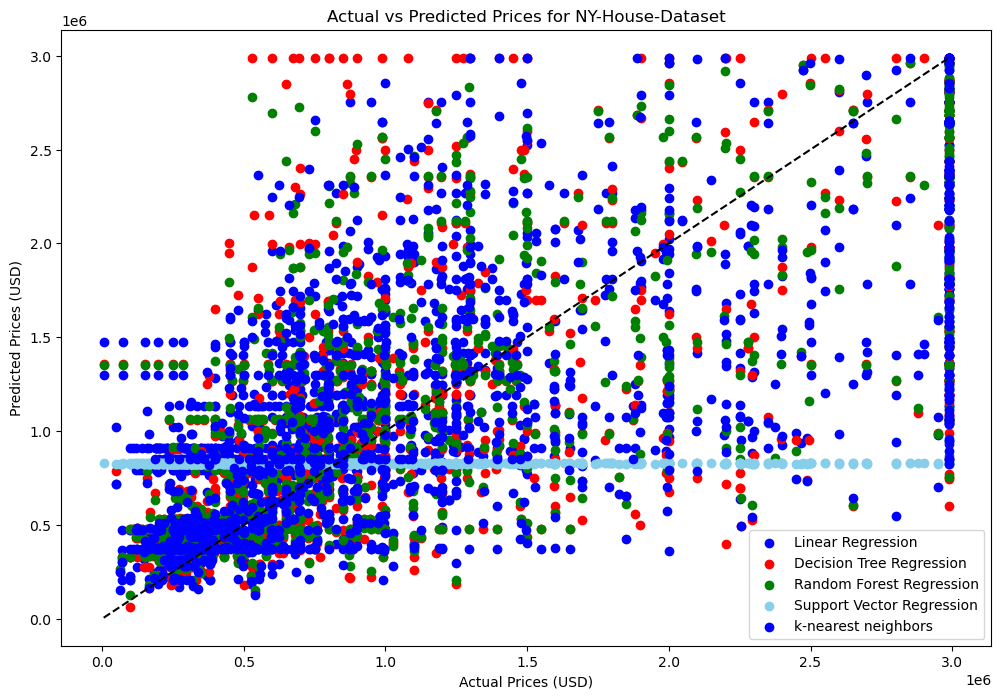

In [66]:
# Scatter plot for predicted vs actual prices
plt.figure(figsize=(12, 8))
# Linear Regression
plt.scatter(y_test, linear_pred, color='blue', label='Linear Regression')
# Decision Tree Regression
plt.scatter(y_test, dt_pred, color='red', label='Decision Tree Regression')
# Random Forest Regression
plt.scatter(y_test, rf_pred, color='green', label='Random Forest Regression')
# Support Vector Regression
plt.scatter(y_test, svr_pred, color='skyblue', label='Support Vector Regression')
# knn_predictions
plt.scatter(y_test, knn_predictions, color='blue', label='k-nearest neighbors')

# Add diagonal line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')
plt.xlabel('Actual Prices (USD)')
plt.ylabel('Predicted Prices (USD)')
plt.title('Actual vs Predicted Prices for NY-House-Dataset')
plt.legend()
plt.show()

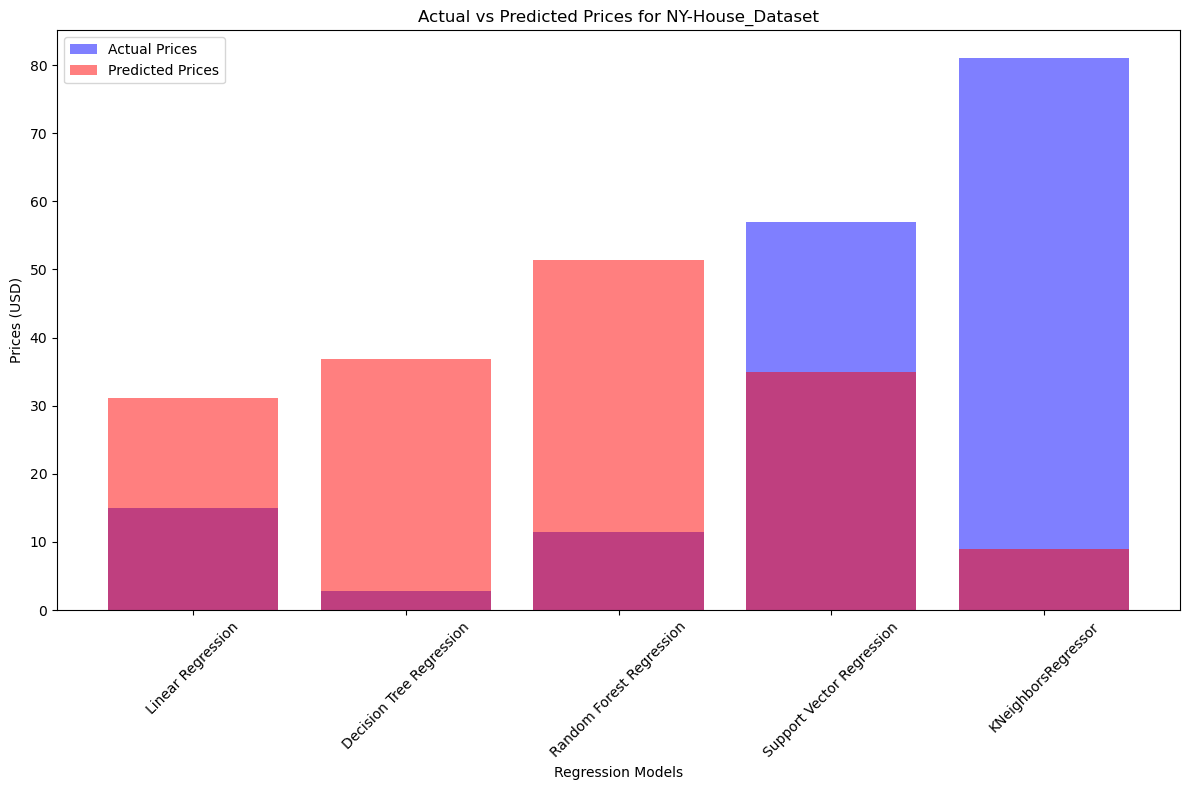

In [67]:
# Sample data
models = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Support Vector Regression','KNeighborsRegressor']
actual_prices = np.random.rand(len(models)) * 100  # Example actual prices
predicted_prices = np.random.rand(len(models)) * 100  # Example predicted prices
plt.figure(figsize=(12, 8))
# Create bar chart
plt.bar(models, actual_prices, color='blue', alpha=0.5, label='Actual Prices')
plt.bar(models, predicted_prices, color='red', alpha=0.5, label='Predicted Prices')
plt.xlabel('Regression Models')
plt.ylabel('Prices (USD)')
plt.title('Actual vs Predicted Prices for NY-House_Dataset')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

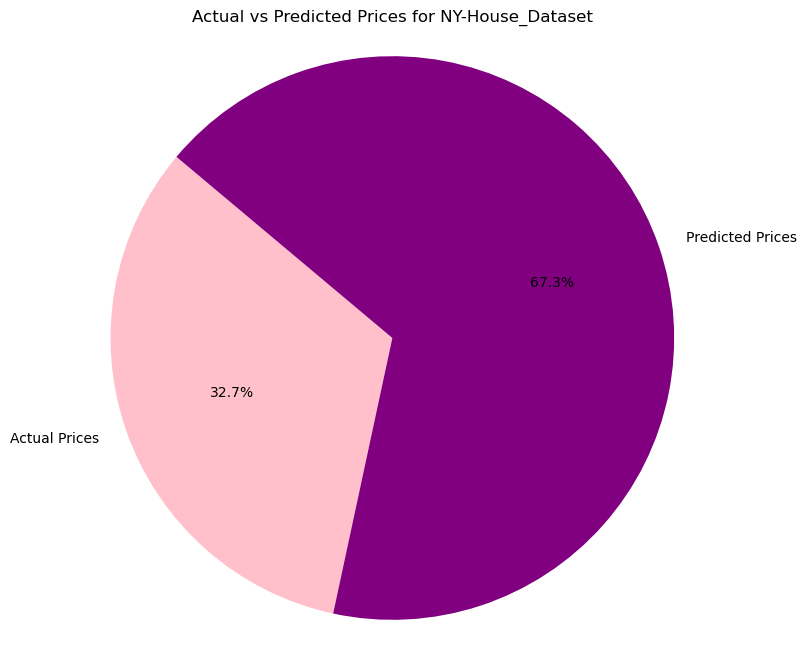

In [68]:
# Sample data
models = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 
          'Support Vector Regression', 'KNeighborsRegressor']
actual_prices = np.random.rand(len(models)) * 100  # Example actual prices
predicted_prices = np.random.rand(len(models)) * 100  # Example predicted prices
# Calculate total actual and predicted prices
total_actual = np.sum(actual_prices)
total_predicted = np.sum(predicted_prices)
# Create pie chart
labels = ['Actual Prices', 'Predicted Prices']
sizes = [total_actual, total_predicted]
colors = ['pink', 'purple']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Actual vs Predicted Prices for NY-House_Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

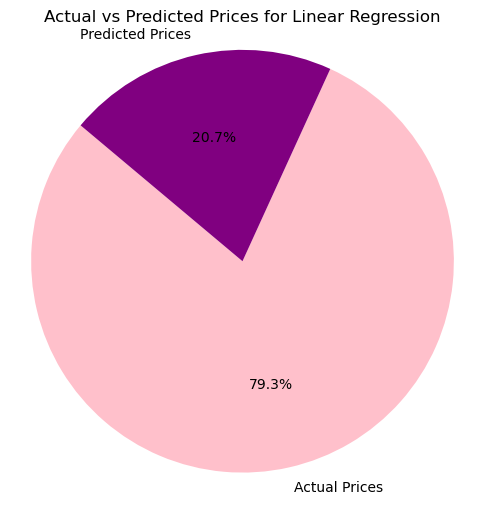

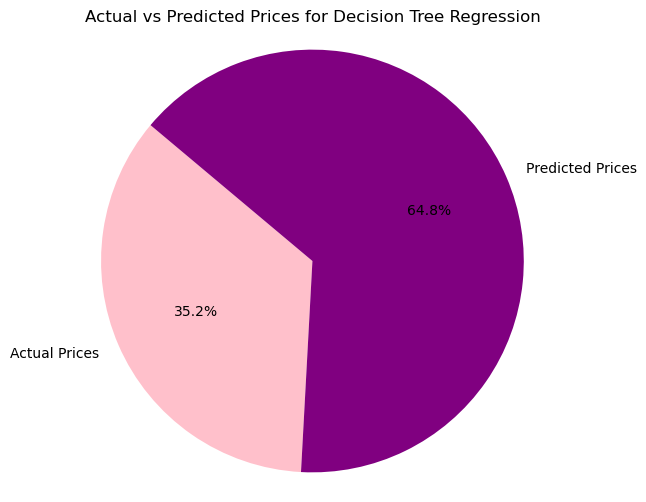

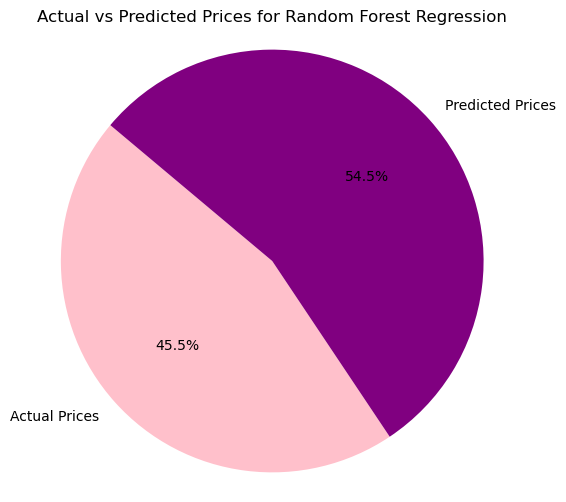

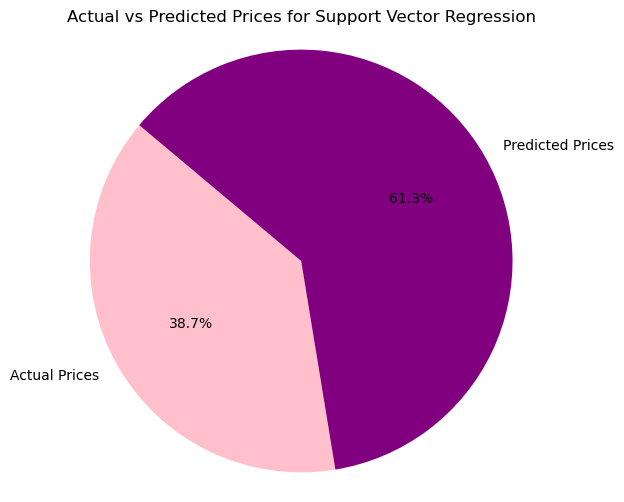

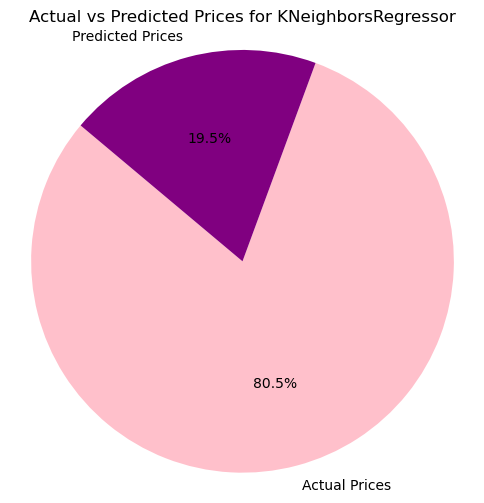

In [69]:
# Sample data
models = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 
          'Support Vector Regression', 'KNeighborsRegressor']
actual_prices = np.random.rand(len(models)) * 100  # Example actual prices
predicted_prices = np.random.rand(len(models)) * 100  # Example predicted prices

# Create pie chart for each model
for i in range(len(models)):
    total_actual = actual_prices[i]
    total_predicted = predicted_prices[i]
    labels = ['Actual Prices', 'Predicted Prices']
    sizes = [total_actual, total_predicted]
    colors = ['pink', 'purple']
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Actual vs Predicted Prices for {models[i]}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

In [70]:
# Scatter plot function
def scatter_plot(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.title(f"Actual vs Predicted Prices - {model_name}")
    plt.xlabel("Actual Prices (USD)")
    plt.ylabel("Predicted Prices (USD)")
    plt.show()

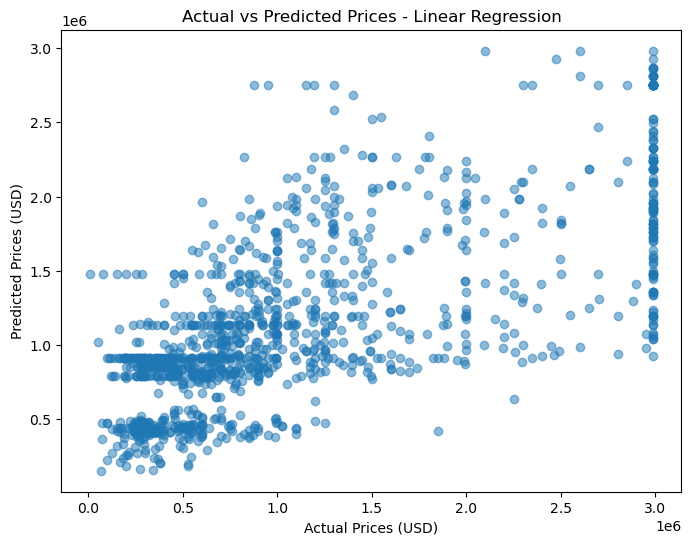

In [71]:
# Scatter plot for Linear Regression
scatter_plot(y_test, linear_pred, "Linear Regression")

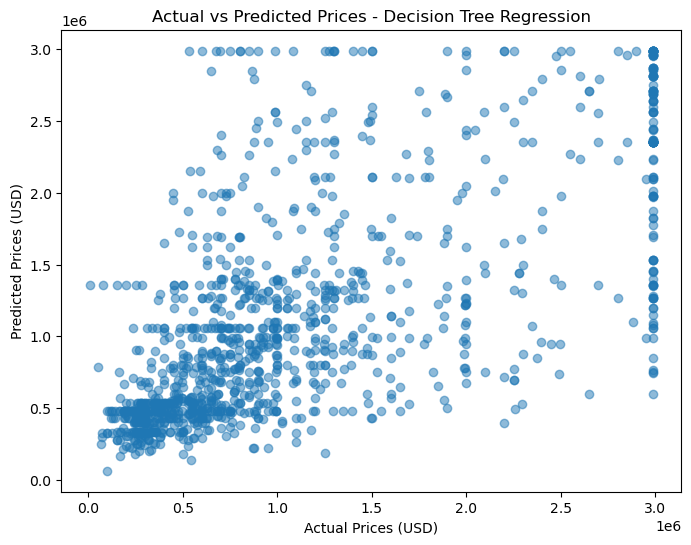

In [72]:
# Scatter plot for Decision Tree Regression
scatter_plot(y_test, dt_pred, "Decision Tree Regression")

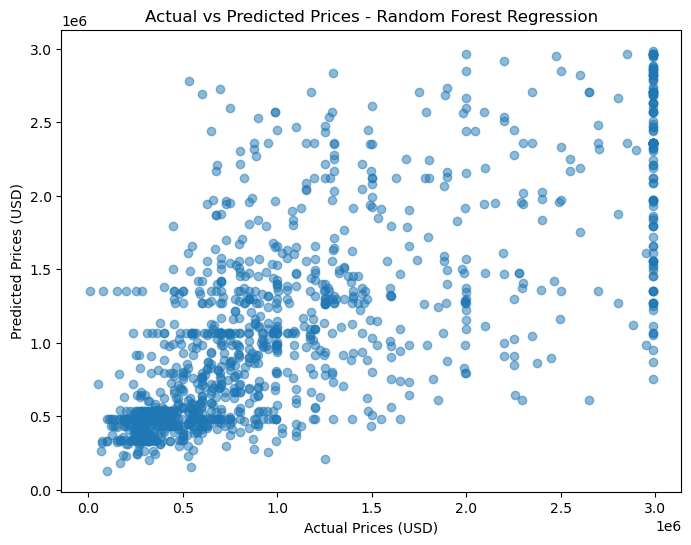

In [73]:
# Scatter plot for Random Forest Regression
scatter_plot(y_test, rf_pred, "Random Forest Regression")

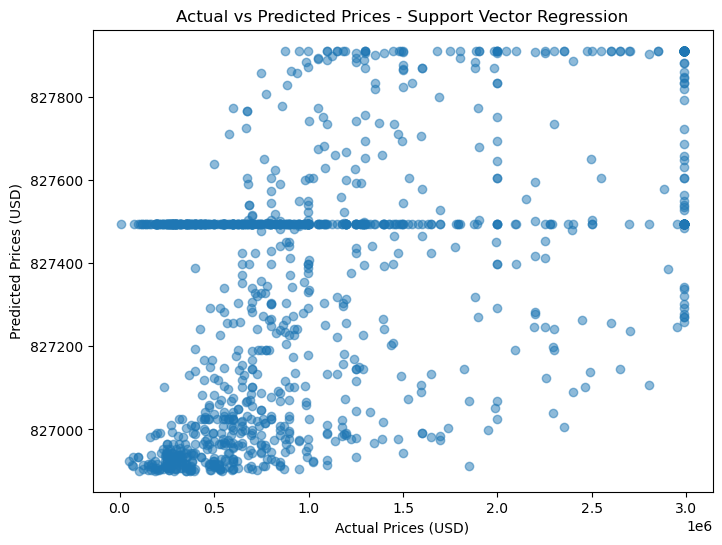

In [74]:
# Scatter plot for Support Vector Regression
scatter_plot(y_test, svr_pred, "Support Vector Regression")

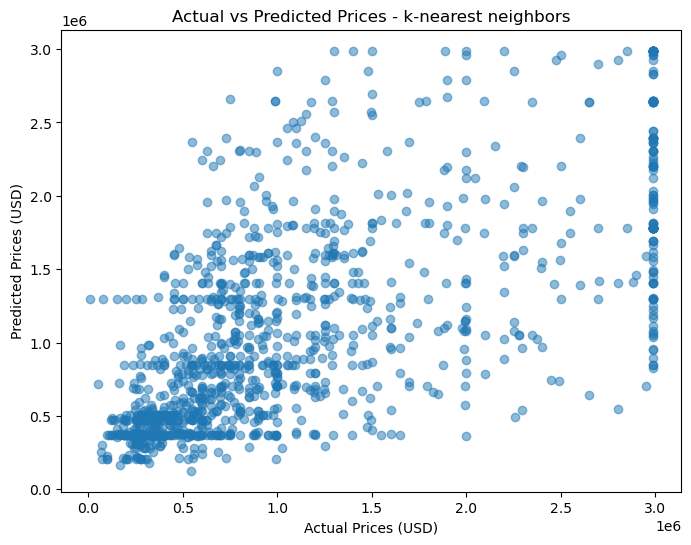

In [75]:
# knn_predictions
scatter_plot(y_test, knn_predictions, 'k-nearest neighbors')